In [2]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '/gpfswork/rech/goe/ufz23bm/notebooks') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
u.check_virtual_memory()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
3.8.3 | packaged by conda-forge | (default, Jun  1 2020, 17:43:00) 
[GCC 7.5.0]
Virtual memory usage - total: 2 TB / available: 2 TB / percent used: 6.9 %


# Load IPSL-CM6A-LR grid

In [4]:
# topo_CMIP6 = xr.open_dataarray(
#     '/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/fx/orog/gr/latest/orog_fx_IPSL-CM6A-LR_historical_r1i1p1f1_gr.nc'
# ).load()
# topo_CMIP6

FileNotFoundError: [Errno 2] No such file or directory: b'/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/fx/orog/gr/latest/orog_fx_IPSL-CM6A-LR_historical_r1i1p1f1_gr.nc'

In [5]:
topo_CMIP6 = xr.open_dataarray(
    '/gpfswork/rech/goe/ufz23bm/data/tas_Amon_IPSL-CM6A-LR_historical_ens_gr_198101-201412.nc'
).load()
topo_CMIP6

<xarray.DataArray 'tas' (time: 408, lat: 143, lon: 144)>
array([[[244.97827, 244.97827, 244.97827, ..., 244.97827, 244.97827,
         244.97827],
        [246.50052, 246.44577, 246.36417, ..., 246.71513, 246.63255,
         246.59978],
        [246.94078, 246.81604, 246.6827 , ..., 247.31738, 247.19333,
         247.08447],
        ...,
        [245.50961, 245.61885, 245.66537, ..., 245.28882, 245.38947,
         245.47873],
        [245.16449, 245.20114, 245.24023, ..., 245.06735, 245.07957,
         245.08282],
        [243.66653, 243.66653, 243.66653, ..., 243.66653, 243.66653,
         243.66653]],

       [[233.57426, 233.57426, 233.57426, ..., 233.57426, 233.57426,
         233.57426],
        [235.6654 , 235.59003, 235.4917 , ..., 235.92316, 235.81879,
         235.78284],
        [236.18182, 236.0113 , 235.83713, ..., 236.68263, 236.53406,
         236.37239],
        ...,
        [243.35971, 243.4305 , 243.47823, ..., 243.14038, 243.26746,
         243.33139],
        [243.03815, 243.08632, 243.10583, ..., 242.96722, 242.961  ,
         242.9848 ],
        [241.47319, 241.47319, 241.47319, ..., 241.47319, 241.47319,
         241.47319]],

       [[218.65295, 218.65295, 218.65295, ..., 218.65295, 218.65295,
         218.65295],
        [222.50926, 222.34352, 222.28082, ..., 222.7045 , 222.63885,
         222.58228],
        [223.22766, 223.02036, 222.79639, ..., 223.86443, 223.67148,
         223.47208],
        ...,
        [244.4028 , 244.54031, 244.63066, ..., 244.07971, 244.24611,
         244.34766],
        [244.02248, 244.06967, 244.12909, ..., 243.89276, 243.90869,
         243.91516],
        [242.45253, 242.45253, 242.45253, ..., 242.45253, 242.45253,
         242.45253]],

       ...,

       [[220.36008, 220.36008, 220.36008, ..., 220.36008, 220.36008,
         220.36008],
        [223.09041, 223.01001, 222.90396, ..., 223.31586, 223.193  ,
         223.18494],
        [223.60963, 223.43536, 223.27496, ..., 224.07544, 223.93887,
         223.7664 ],
        ...,
        [265.55023, 265.6576 , 265.73657, ..., 265.2885 , 265.4109 ,
         265.4928 ],
        [265.7302 , 265.78082, 265.81937, ..., 265.6341 , 265.64673,
         265.66806],
        [265.3757 , 265.3757 , 265.3757 , ..., 265.3757 , 265.3757 ,
         265.3757 ]],

       [[236.184  , 236.184  , 236.184  , ..., 236.184  , 236.184  ,
         236.184  ],
        [237.92719, 237.86865, 237.7808 , ..., 238.14584, 238.05994,
         238.02127],
        [238.42755, 238.2804 , 238.13773, ..., 238.84595, 238.71304,
         238.57825],
        ...,
        [258.62946, 258.74603, 258.8238 , ..., 258.34103, 258.48834,
         258.56686],
        [258.65607, 258.7105 , 258.7547 , ..., 258.55063, 258.55914,
         258.57803],
        [258.0253 , 258.0253 , 258.0253 , ..., 258.0253 , 258.0253 ,
         258.0253 ]],

       [[246.14568, 246.14568, 246.14568, ..., 246.14568, 246.14568,
         246.14568],
        [247.51324, 247.45847, 247.38046, ..., 247.72192, 247.64362,
         247.59998],
        [247.93562, 247.81537, 247.68349, ..., 248.29333, 248.17786,
         248.0658 ],
        ...,
        [252.29237, 252.3977 , 252.4671 , ..., 252.0153 , 252.16098,
         252.2415 ],
        [252.27333, 252.31648, 252.34645, ..., 252.17532, 252.18141,
         252.20528],
        [251.39471, 251.39471, 251.39471, ..., 251.39471, 251.39471,
         251.39471]]], dtype=float32)
Coordinates:
    height   float64 2.0
  * lat      (lat) float32 -90.0 -88.73239 -87.46479 ... 87.46479 88.73239 90.0
  * time     (time) datetime64[ns] 1981-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       air_temperature
    long_name:           Near-Surface Air Temperature
    history:             none
    units:               K
    cell_

In [11]:
path_1 = '/gpfsstore/rech/goe/ufz23bm/IGCM_OUT/LMDZ/ELC-144x142x79/ATM'
path_2 = '/gpfsstore/rech/goe/ufz23bm/IGCM_OUT/LMDZOR_v6.1.11_without_elevation_average/ELC-144x142x79/ATM'

limit_1 = xr.open_dataset(path_1+'/Output/Boundary/ELC-144x142x79_clim_limit.nc')
grilles_gcm_1 = xr.open_dataset(path_1+'/Output/Grid/ELC-144x142x79_grilles_gcm.nc')
start_1 = xr.open_dataset(path_1+'/Output/Restart/ELC-144x142x79_clim_start.nc')
startphy_1 = xr.open_dataset(path_1+'/Output/Restart/ELC-144x142x79_clim_startphy.nc')

limit_2 = xr.open_dataset(path_2+'/Output/Boundary/ELC-144x142x79_clim_limit.nc')
grilles_gcm_2 = xr.open_dataset(path_2+'/Output/Grid/ELC-144x142x79_grilles_gcm.nc')
start_2 = xr.open_dataset(path_2+'/Output/Restart/ELC-144x142x79_clim_start.nc')
startphy_2 = xr.open_dataset(path_2+'/Output/Restart/ELC-144x142x79_clim_startphy.nc')

# orog_fx_IPSL = xr.open_dataarray('/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/fx/orog/gr/latest/orog_fx_IPSL-CM6A-LR_historical_r1i1p1f1_gr.nc')
orog_fx_IPSL = xr.open_dataarray('/gpfswork/rech/goe/ufz23bm/data/tas_Amon_IPSL-CM6A-LR_historical_ens_gr_198101-201412.nc')[0]

## Make function to come back to normal grid

In [18]:
# Draft function to get the mean orography from startphy and put it on the format than CMIP6 grid
# See LMDZ_grid_physics2dynamics.ipynb for more details

def physics2dynamics(grilles_gcm, startphy, orog_fx_IPSL, var='ZMEA'):
    # Create the right dimension for topo (without the duplicated longitude)
    da = grilles_gcm.aire[:,:-1].copy()

    # Dupplicate the first and last value North and South Pole
    da[0] = startphy[var][0]
    da[-1] = startphy[var][-1]

    # Fill all the values except the poles
    k=0
    for lat in range(da[1:-1,:].latu.size):
        for lon in range(da[1:-1,:].lonv.size):
            da[1:-1,:][lat,lon] = startphy[var][k+1]
            k += 1

    da_correct = orog_fx_IPSL.copy()
    da_correct.values = da.roll(
        lonv=int(da.lonv.size/2), roll_coords=True
    ).sortby('latu').values
    da_correct.name = var
    da_correct
    
    return da_correct

## Get orography variables

In [30]:
zmea_1 = physics2dynamics(grilles_gcm_1, startphy_1, orog_fx_IPSL, var='ZMEA')
zmea_2 = physics2dynamics(grilles_gcm_2, startphy_2, orog_fx_IPSL, var='ZMEA')

zstd_1 = physics2dynamics(grilles_gcm_1, startphy_1, orog_fx_IPSL, var='ZSTD')
zstd_2 = physics2dynamics(grilles_gcm_2, startphy_2, orog_fx_IPSL, var='ZSTD')

zpic_1 = physics2dynamics(grilles_gcm_1, startphy_1, orog_fx_IPSL, var='ZPIC')
zpic_2 = physics2dynamics(grilles_gcm_2, startphy_2, orog_fx_IPSL, var='ZPIC')

zval_1 = physics2dynamics(grilles_gcm_1, startphy_1, orog_fx_IPSL, var='ZVAL')
zval_2 = physics2dynamics(grilles_gcm_2, startphy_2, orog_fx_IPSL, var='ZVAL')

## Plot ZMEA

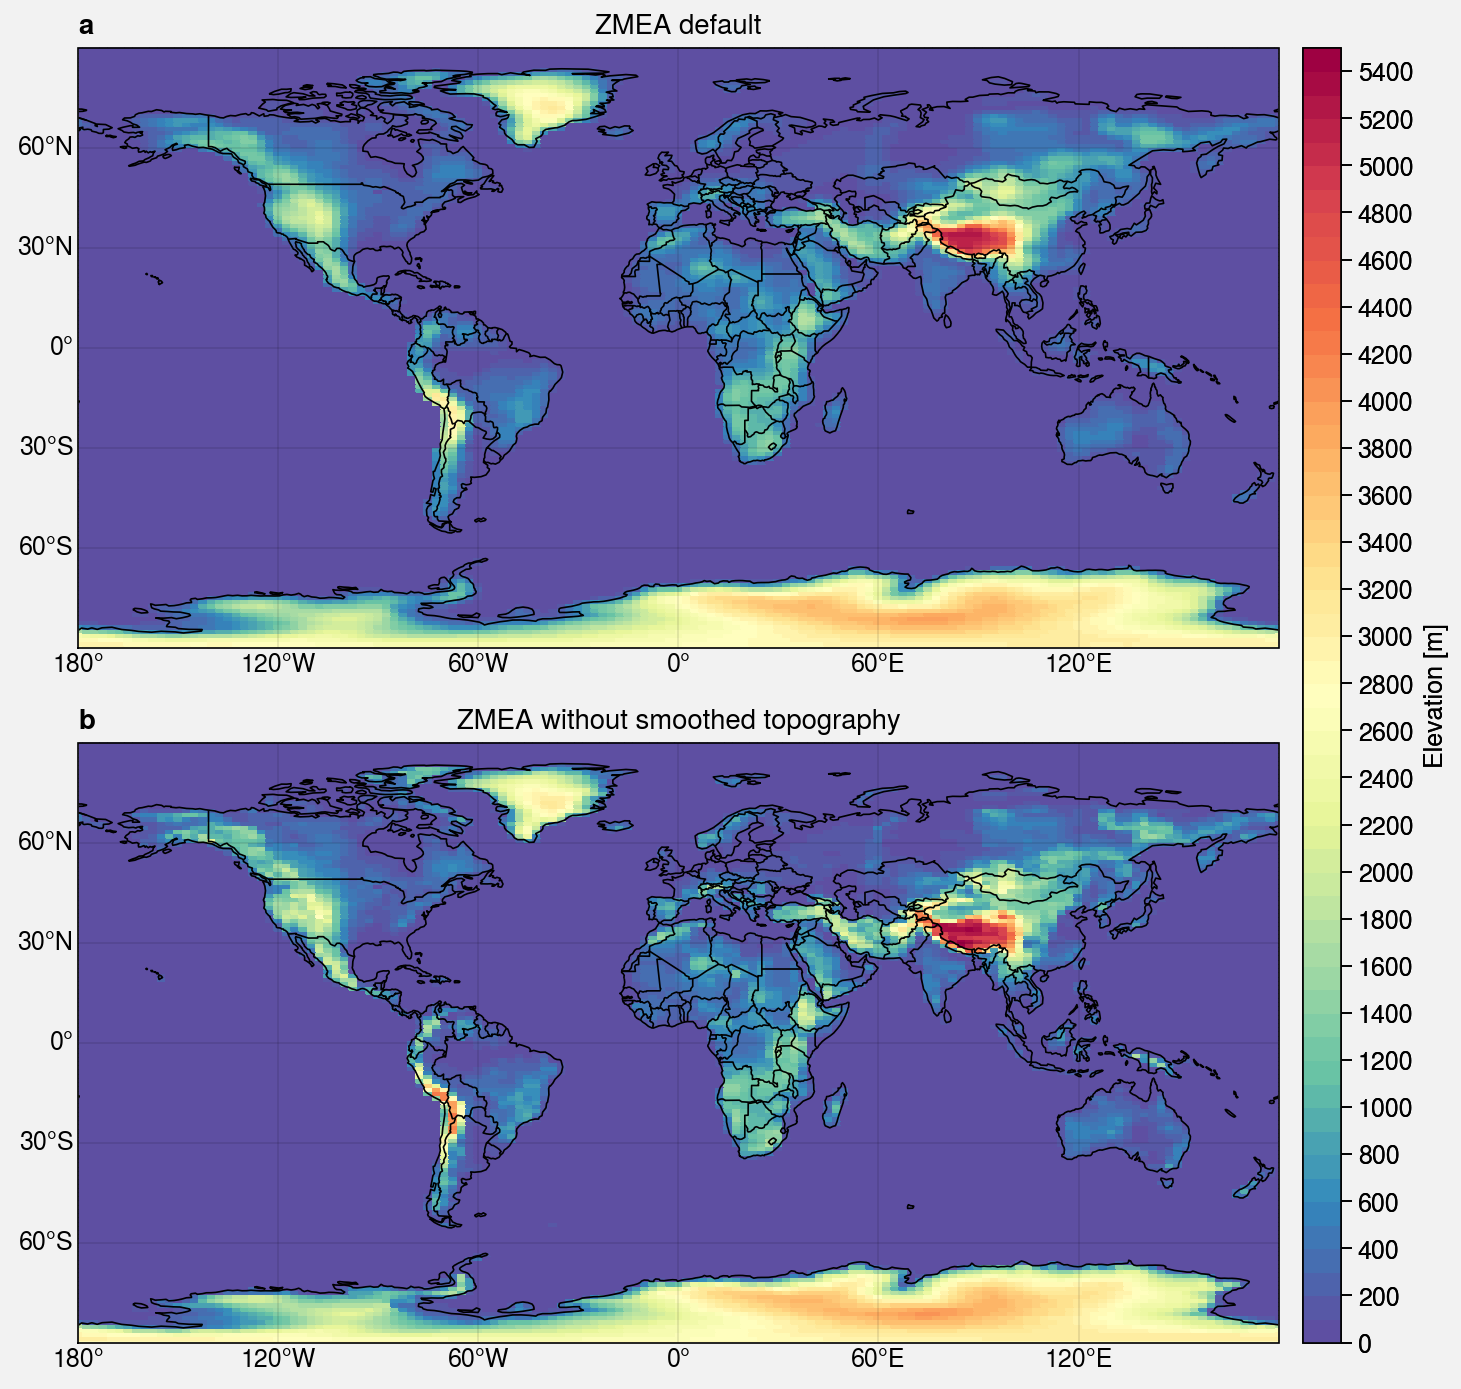

In [43]:
levels = plot.arange(0,5500,100)
cmap = 'Spectral_r'

f, axs = plot.subplots(proj='cyl', ncols=1, nrows=2, axwidth=6)

axs[0].pcolormesh(zmea_1, cmap=cmap, levels=levels)
axs[0].format(title='ZMEA default')

m = axs[1].pcolormesh(zmea_2, cmap=cmap, levels=levels)
axs[1].format(title='ZMEA without smoothed topography')

f.colorbar(m, label='Elevation [m]')

axs.format(labels=True, coast=True, borders=True, lonlines=60, latlines=30, abc=True)

## Plot ZSTD

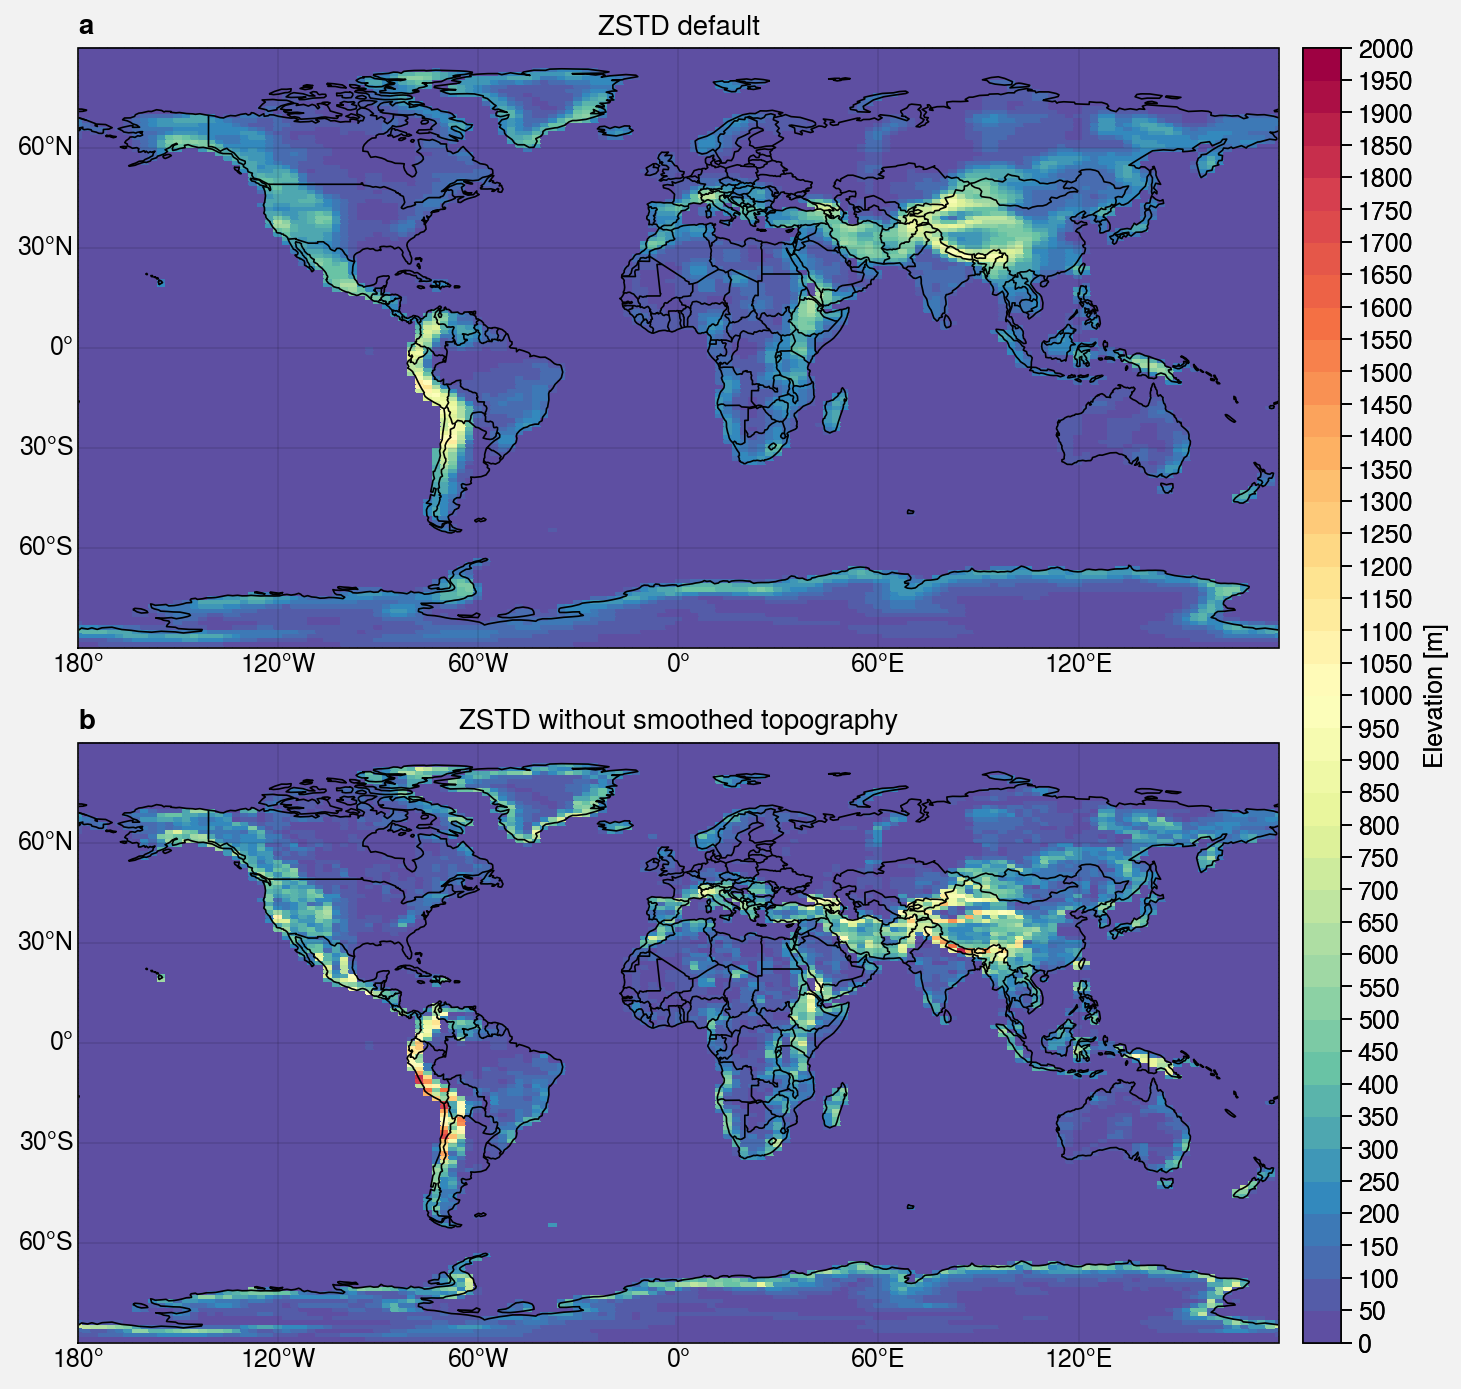

In [44]:
levels = plot.arange(0,2000,50)
cmap = 'Spectral_r'

f, axs = plot.subplots(proj='cyl', ncols=1, nrows=2, axwidth=6)

axs[0].pcolormesh(zstd_1, cmap=cmap, levels=levels)
axs[0].format(title='ZSTD default')

m = axs[1].pcolormesh(zstd_2, cmap=cmap, levels=levels)
axs[1].format(title='ZSTD without smoothed topography')

f.colorbar(m, label='Elevation [m]')

axs.format(labels=True, coast=True, borders=True, lonlines=60, latlines=30, abc=True)

## Plot ZPIC

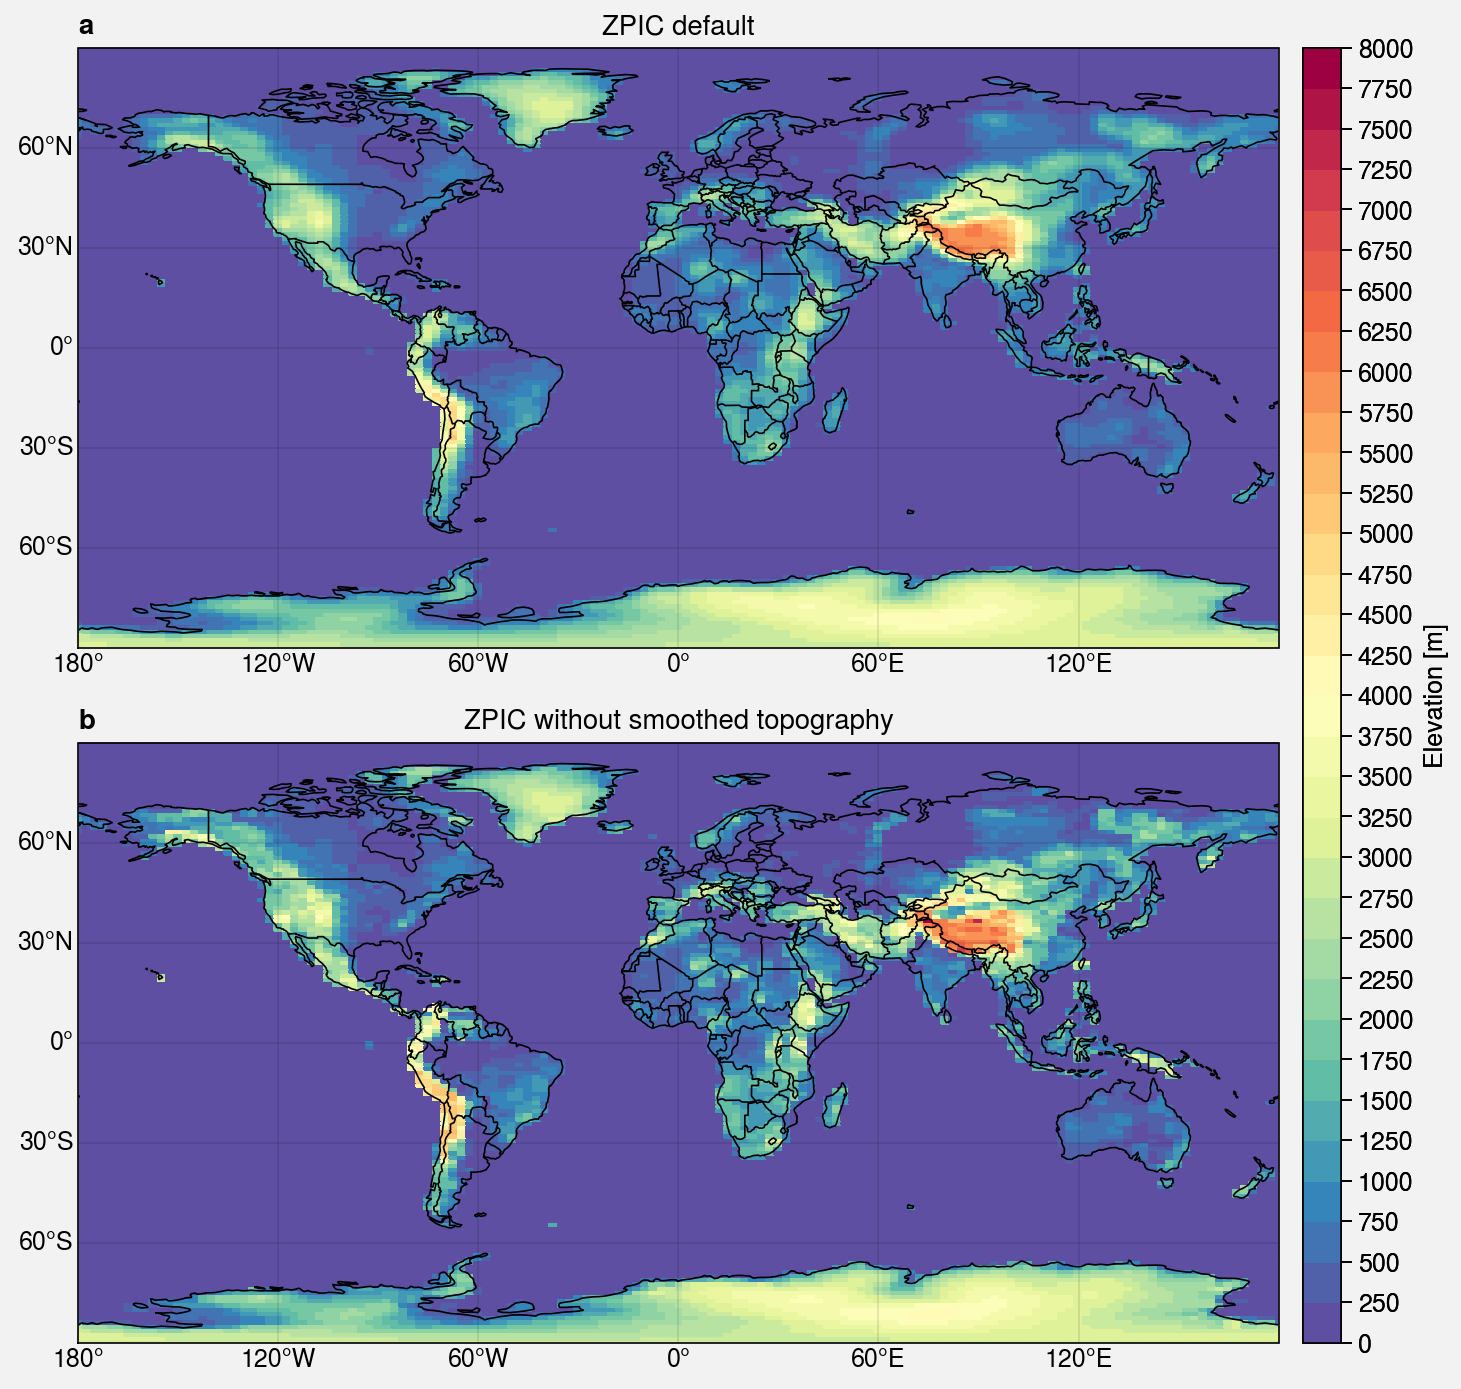

In [37]:
levels = plot.arange(0,8000,250)
cmap = 'Spectral_r'

f, axs = plot.subplots(proj='cyl', ncols=1, nrows=2, axwidth=6)

axs[0].pcolormesh(zpic_1, cmap=cmap, levels=levels)
axs[0].format(title='ZPIC default')

m = axs[1].pcolormesh(zpic_2, cmap=cmap, levels=levels)
axs[1].format(title='ZPIC without smoothed topography')

f.colorbar(m, label='Elevation [m]')

axs.format(labels=True, coast=True, borders=True, lonlines=60, latlines=30, abc=True)

## Plot ZVAL

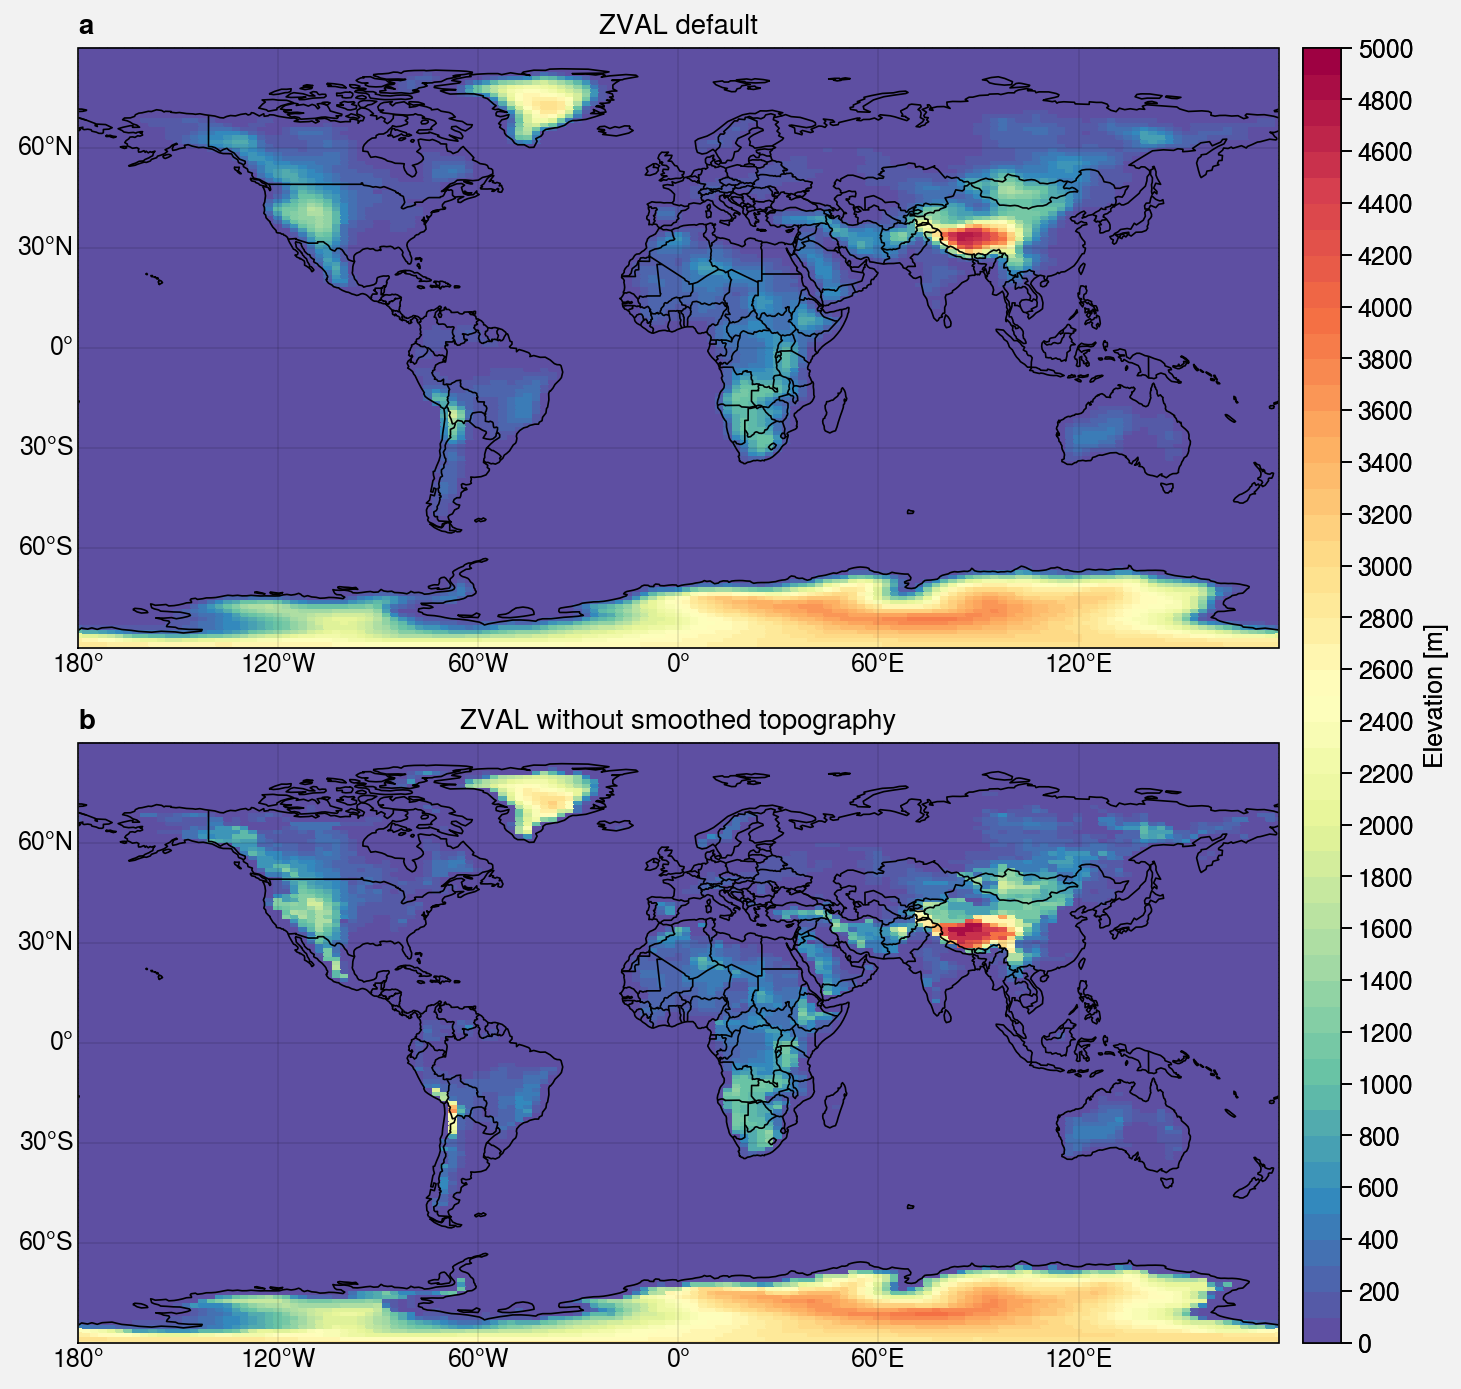

In [48]:
levels = plot.arange(0,5000,100)
cmap = 'Spectral_r'

f, axs = plot.subplots(proj='cyl', ncols=1, nrows=2, axwidth=6)

axs[0].pcolormesh(zval_1, cmap=cmap, levels=levels)
axs[0].format(title='ZVAL default')

m = axs[1].pcolormesh(zval_2, cmap=cmap, levels=levels)
axs[1].format(title='ZVAL without smoothed topography')

f.colorbar(m, label='Elevation [m]')

axs.format(labels=True, coast=True, borders=True, lonlines=60, latlines=30, abc=True)